This notebook shows a way to obtain atomic coordinates from xyz files. We can calculate bond lengths, bond angles, coordination numbers, and so on from atomic coordinates. Some of them might be able to be used as good features. 

![monoclinic_and_hexagonal](https://github.com/Tony-Y/MaterialsAreSimilarToDocuments/blob/master/monoclinic_and_hexagonal.png?raw=true)

1. Reading geometry files
2. Reduced coordinates
3. Geometrical properties

# Reading geometry files

[Jmol](http://jmol.sourceforge.net) is an open source molecular viewer. Jmol can load xyz geometry files directly.

![train 1 geometry](https://github.com/Tony-Y/MaterialsAreSimilarToDocuments/blob/master/geometry.jpg?raw=true)

This figure is a visualization example of **train/1/gemometry.xyz**.


In [1]:
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
import os

In [5]:
DATA_DIR = './data'

In [7]:
df_train = pd.read_csv(os.path.join('..', DATA_DIR, 'train.csv'))
df_train["dataset"] = "train"
df_test = pd.read_csv(os.path.join('..', DATA_DIR, 'test.csv'))
df_test["dataset"] = "test"
df_crystals = pd.concat([df_train, df_test], ignore_index=True)

In [8]:
df_crystals.head()

,bandgap_energy_ev,dataset,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,spacegroup
0,3.4387,train,0.0680,1,90.0026,90.0023,90.0017,9.9523,8.5513,9.1775,80.0,0.6250,0.3750,0.000,33
1,2.9210,train,0.2490,2,90.0186,89.9980,120.0025,6.1840,6.1838,23.6287,80.0,0.6250,0.3750,0.000,194
2,2.7438,train,0.1821,3,90.9688,91.1228,30.5185,9.7510,5.6595,13.9630,40.0,0.8125,0.1875,0.000,227
3,3.3492,train,0.2172,4,89.9888,90.0119,120.0017,5.0036,5.0034,13.5318,30.0,0.7500,0.0000,0.250,167
4,1.3793,train,0.0505,5,89.9960,90.0006,119.9893,6.6614,6.6612,24.5813,80.0,0.0000,0.6250,0.375,194


In [9]:
df_crystals.tail()

,bandgap_energy_ev,dataset,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,spacegroup
2995,NaN,test,NaN,596,90.0002,104.7733,90.0001,24.8145,6.3964,6.2933,80.0,0.000,0.5938,0.4062,12
2996,NaN,test,NaN,597,90.0008,89.9967,90.0004,5.5783,9.4849,10.1107,40.0,0.125,0.0000,0.8750,33
2997,NaN,test,NaN,598,90.0072,89.9880,119.9857,6.9377,6.9372,25.0641,80.0,0.000,0.2500,0.7500,194
2998,NaN,test,NaN,599,90.0041,90.0009,90.0007,5.1841,8.8659,9.4956,40.0,0.625,0.0000,0.3750,33
2999,NaN,test,NaN,600,90.0029,90.0031,89.9969,9.4959,9.4956,9.4956,80.0,0.375,0.3438,0.2812,206


In [54]:
# Orthorhombic (kappa-Al2O3 type) (spacegroup 33, mm2)
row_id = 0

# Monoclinic (beta-Ga2O3 type) (spacegroup 12, 2/m)
#row_id = 19

# Cubic (bixbyite) (spacegroup 206, 2/m -3)
#row_id = 100

# Cubic (fcc diamond) (spacegroup 227, 4/m -3 2/m)
#row_id = 400

# Trigonal (corundum) (spacegroup 167, -3 2/m)
#row_id = 18

# Hexagonal (hcp type) (spacegroup 194, 6/m 2/m 2/m)
#row_id = 660

# The first row in the test dataset
#row_id = len(df_train)

print("ID: {}".format(row_id))

ID: 0


In [55]:
lattice_columns = ["lattice_vector_1_ang", "lattice_vector_2_ang", "lattice_vector_3_ang",
                   "lattice_angle_alpha_degree", "lattice_angle_beta_degree", "lattice_angle_gamma_degree"]
df_crystals.loc[row_id]

bandgap_energy_ev              3.4387
dataset                         train
formation_energy_ev_natom       0.068
id                                  1
lattice_angle_alpha_degree    90.0026
lattice_angle_beta_degree     90.0023
lattice_angle_gamma_degree    90.0017
lattice_vector_1_ang           9.9523
lattice_vector_2_ang           8.5513
lattice_vector_3_ang           9.1775
number_of_total_atoms              80
percent_atom_al                 0.625
percent_atom_ga                 0.375
percent_atom_in                     0
spacegroup                         33
Name: 0, dtype: object

You can see the lattice constants $a$, $b$, $c$, $\alpha$, $\beta$, and $\gamma$ in the above visualization equal to ones in the CSV file. 

In [56]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=np.float),x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=np.float))
    return pos_data, np.array(lat_data)

In [57]:
idx = df_crystals.id.values[row_id]
dataset = df_crystals.dataset.values[row_id]
fn = os.path.join('..', DATA_DIR, '{}', '{}', 'geometry.xyz').format(dataset, idx)
crystal_xyz, crystal_lat = get_xyz_data(fn)

In [58]:
crystal_xyz

[[array([1.60888794, 7.27641622, 6.38315519]), 'Ga'],
 [array([6.5849318 , 7.2527921 , 6.36582623]), 'Al'],
 [array([3.43575841, 1.25977584, 1.79461265]), 'Al'],
 [array([8.41180227, 1.23615172, 1.77728368]), 'Ga'],
 [array([0.95588031, 2.99892522, 1.80135131]), 'Ga'],
 [array([5.93192417, 2.9753011 , 1.78402234]), 'Al'],
 [array([4.08876604, 5.53726684, 6.37641653]), 'Al'],
 [array([9.0648099 , 5.51364272, 6.35908757]), 'Al'],
 [array([ 0.91723977,  5.62244433, -0.00937511]), 'Al'],
 [array([ 5.89328363,  5.59882021, -0.02670407]), 'Ga'],
 [array([4.11494027, 2.90993936, 4.57123193]), 'Ga'],
 [array([9.09098413, 2.88631524, 4.55390297]), 'Al'],
 [array([1.6195002 , 1.34833524, 4.58165063]), 'Al'],
 [array([6.59554406, 1.32471112, 4.56432166]), 'Ga'],
 [array([3.44432022, 7.19371437, 9.15764532]), 'Al'],
 [array([8.42036408, 7.17009025, 9.14031635]), 'Ga'],
 [array([0.86879359, 0.26222265, 9.1650644 ]), 'Ga'],
 [array([5.84483745, 0.23859853, 9.14773544]), 'Al'],
 [array([4.19496355, 8

This list conatins pairs of the position vector $(X, Y, Z)$ and the element symbol.

In [59]:
crystal_lat

array([[ 9.95208772e+00, -4.72482400e-02, -3.46579300e-02],
       [ 4.03159900e-02,  8.55117485e+00, -9.53377000e-03],
       [ 3.16403800e-02,  9.66592000e-03,  9.17743912e+00]])

This matrix is $(\textbf{a}_1, \textbf{a}_2, \textbf{a}_3)^t$ where $\textbf{a}_i$ is $i$-th lattice vector.

In [60]:
def length(v):
    return np.linalg.norm(v)

def unit_vector(vector):
    return vector / length(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def angle_deg_between(v1, v2):
    return np.degrees(angle_between(v1, v2))

def get_lattice_constants(lattice_vectors):
    lat_const_series = pd.Series()
    for i in range(3):
        lat_const_series["lattice_vector_"+str(i+1)+"_ang"] = length(lattice_vectors[i])
    lat_const_series["lattice_angle_alpha_degree"] = angle_deg_between(lattice_vectors[1],lattice_vectors[2])
    lat_const_series["lattice_angle_beta_degree"] = angle_deg_between(lattice_vectors[2],lattice_vectors[0])
    lat_const_series["lattice_angle_gamma_degree"] = angle_deg_between(lattice_vectors[0],lattice_vectors[1])
    return lat_const_series

In [61]:
get_lattice_constants(crystal_lat)

lattice_vector_1_ang           9.952260
lattice_vector_2_ang           8.551275
lattice_vector_3_ang           9.177499
lattice_angle_alpha_degree    90.002603
lattice_angle_beta_degree     90.002283
lattice_angle_gamma_degree    90.001662
dtype: float64

You can see the lattice constants again.

# Reduced coordinates

When the reduced coordinate is donated as $\textbf{r} = (x, y, z)^t$, the position vector $\textbf{R}$ is expressed using the lattice vectors $\textbf{a}_i$ as following:

$\textbf{R} = (X, Y, Z)^t = x \textbf{a}_1 + y \textbf{a}_2 + z \textbf{a}_3 = A \textbf{r}$

where $A =(\textbf{a}_1, \textbf{a}_2, \textbf{a}_3)$. The reduced coordinate is obtained from:

$\textbf{r} = A^{-1} \textbf{R}$.

$B = A^{-1} =(\textbf{b}_1, \textbf{b}_2, \textbf{b}_3)^t$ where $\textbf{b}_i$ is the $i$-th reciprocal lattice vector.

In [65]:
A = np.transpose(crystal_lat)
R = crystal_xyz[0][0]
print("The lattice vectors:")
print(A)
print("The first position vector:")
print(R)

The lattice vectors:
[[ 9.95208772e+00  4.03159900e-02  3.16403800e-02]
 [-4.72482400e-02  8.55117485e+00  9.66592000e-03]
 [-3.46579300e-02 -9.53377000e-03  9.17743912e+00]]
The first position vector:
[1.60888794 7.27641622 6.38315519]


In [66]:
from numpy.linalg import inv
B = inv(A)
print("The reciprocal lattice vectors:")
print(B)

The reciprocal lattice vectors:
[[ 0.10047797 -0.00047411 -0.00034591]
 [ 0.00055475  0.11694024 -0.00012508]
 [ 0.00038002  0.00011969  0.10896142]]


In [67]:
r = np.matmul(B, R)
print("The first reduced coordinate vector:")
print(r)

The first reduced coordinate vector:
[0.156 0.851 0.697]


# Geometrical properties

Crystalline materials are made of periodic cells. Therefore, geometrical properties must be calculated with consideration for the periodicity. The vector between two atoms $i$ and $j$ is expressed as:

$\textbf{r}_{ij} =  \textbf{r}_{i} - \textbf{r}_{j} + (l, m, n)^t$

where $l$, $m$, and $n$ are any integer value. The real-space vector of the atom pair is

$\textbf{R}_{ij} = A \textbf{r}_{ij}$.

## Spatial distance

$d_{ij} = \min_{l,m,n} \mid \textbf{R}_{ij} \mid$

In [68]:
def get_shortest_distances(reduced_coords, amat):
    natom = len(reduced_coords)
    dists = np.zeros((natom, natom))
    Rij_min = np.zeros((natom, natom, 3))

    for i in range(natom):
        for j in range(i):
            rij = reduced_coords[i][0] - reduced_coords[j][0]
            d_min = np.inf
            R_min = np.zeros(3)
            for l in range(-1, 2):
                for m in range(-1, 2):
                    for n in range(-1, 2):
                        r = rij + np.array([l, m, n])
                        R = np.matmul(amat, r)
                        d = length(R)
                        if d < d_min:
                            d_min = d
                            R_min = R
            dists[i, j] = d_min
            dists[j, i] = dists[i, j]
            Rij_min[i, j] = R_min
            Rij_min[j, i] = -Rij_min[i, j]
    return dists, Rij_min

In [69]:
crystal_red = [[np.matmul(B, R), symbol] for (R, symbol) in crystal_xyz]
crystal_dist, crystal_Rij = get_shortest_distances(crystal_red, A)
crystal_dist

array([[0.        , 4.97613011, 5.57216859, ..., 5.17521676, 3.54204162,
        6.00992759],
       [4.97613011, 0.        , 6.09855852, ..., 4.41081625, 6.00992759,
        3.54204162],
       [5.57216859, 6.09855852, 0.        , ..., 6.00972281, 4.41089801,
        5.17549532],
       ...,
       [5.17521676, 4.41081625, 6.00972281, ..., 0.        , 5.67783105,
        4.87034791],
       [3.54204162, 6.00992759, 4.41089801, ..., 5.67783105, 0.        ,
        4.97613011],
       [6.00992759, 3.54204162, 5.17549532, ..., 4.87034791, 4.97613011,
        0.        ]])

In [72]:
crystal_Rij.shape

(80, 80, 3)

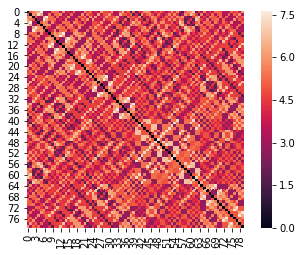

In [76]:
import seaborn as sns
sns.heatmap(crystal_dist, square=True);

In [77]:
def get_min_length(distances, A_atoms, B_atoms):
    A_B_length = np.inf
    for i in A_atoms:
        for j in B_atoms:
            d = distances[i, j]
            if d > 1e-8 and d < A_B_length:
                A_B_length = d
    
    return A_B_length

In [78]:
natom = len(crystal_red)
al_atoms = [i for i in range(natom) if crystal_red[i][1] == 'Al']
ga_atoms = [i for i in range(natom) if crystal_red[i][1] == 'Ga']
in_atoms = [i for i in range(natom) if crystal_red[i][1] == 'In']
o_atoms = [i for i in range(natom) if crystal_red[i][1] == 'O']

In [79]:
if len(al_atoms):
    print("Al-O min length:", get_min_length(crystal_dist, al_atoms, o_atoms))
if len(ga_atoms):
    print("Ga-O min length:", get_min_length(crystal_dist, ga_atoms, o_atoms))
if len(in_atoms):
    print("In-O min length:", get_min_length(crystal_dist, in_atoms, o_atoms))

Al-O min length: 1.771244409699857
Ga-O min length: 1.7712444096998565


~~The minimun lengths between metal and oxygen atoms can be used for estimating the threshold of connections in the crystal graph.  However, the current version of this notebook does not use the suggested method yet.~~ (I introduced the function get_factor which appears below.)

## Histogram of distances

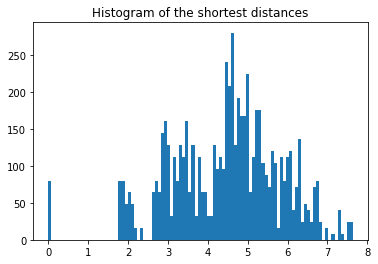

In [81]:
hist_dist = plt.hist(crystal_dist.flatten(), bins=100)
plt.title("Histogram of the shortest distances");

In [82]:
def get_distances(r, amat, l_max=3, m_max=3, n_max=3, R_max=20.0):
    distances = []
    for l in range(-l_max, l_max+1):
        for m in range(-m_max, m_max+1):
            for n in range(-n_max, n_max+1):
                R = np.matmul(amat, r + np.array([l, m, n]))
                d = length(R)
                if d < R_max:
                    distances.append(d)
                    
    return distances

Note that optimal values of `l_max`, `m_max`, and `n_max` depend on both the maximum radius `R_max` and the lattice matrix `amat`. A larger `R_max` or a smaller cell requires larger `l_max`, `m_max`, and `n_max`. You can simply estimate them from $l_{\rm max} > R_{\rm max} / a$ where $a$ is the lattice constant. In general, $l_{\rm max} >  R_{\rm max} \cdot \mid{\bf b}_1\mid$, $m_{\rm max} >  R_{\rm max} \cdot \mid{\bf b}_2\mid$, and $n_{\rm max} >  R_{\rm max} \cdot \mid{\bf b}_3\mid$ where ${\bf b }_i$ is the $i$-th reciprocal lattice vector.

In [83]:
def get_optimal_lmn(bmat, R_max=20.0):
    lmn = dict()
    lmn["l_max"] = int(length(bmat[0]) * R_max) + 1
    lmn["m_max"] = int(length(bmat[1]) * R_max) + 1
    lmn["n_max"] = int(length(bmat[2]) * R_max) + 1
    lmn["R_max"] = R_max

    return lmn

In [84]:
opt_lmn = get_optimal_lmn(B)

print(opt_lmn)

{'l_max': 3, 'm_max': 3, 'n_max': 3, 'R_max': 20.0}


In [85]:
natom = len(crystal_red)
m_atoms = [i for i in range(natom) if crystal_red[i][1] != 'O']
o_atoms = [i for i in range(natom) if crystal_red[i][1] == 'O']

m_o_distances = []
for i in m_atoms:
    for j in o_atoms:
        rij = np.matmul(B, crystal_Rij[i, j])
        m_o_distances += get_distances(rij, A, **opt_lmn)

In [86]:
m_m_distances = []
for i in m_atoms:
    for j in m_atoms:
        rij = np.matmul(B, crystal_Rij[i, j])
        m_m_distances += get_distances(rij, A, **opt_lmn)

In [87]:
o_o_distances = []
for i in o_atoms:
    for j in o_atoms:
        rij = np.matmul(B, crystal_Rij[i, j])
        o_o_distances += get_distances(rij, A, **opt_lmn)

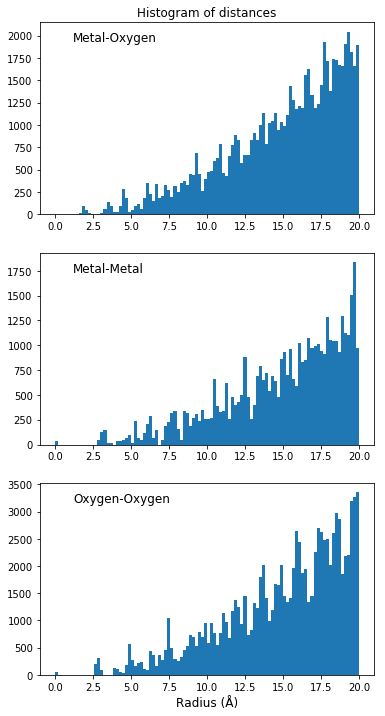

In [88]:
plt.figure(figsize=(6,12))

ax1 = plt.subplot(311)
hist_m_o_dist = plt.hist(m_o_distances, bins=100, range=(0, 20))
plt.text(0.1, 0.9, "Metal-Oxygen", fontsize=12, transform=ax1.transAxes)

plt.title("Histogram of distances")

ax2 = plt.subplot(312)
hist_m_m_dist = plt.hist(m_m_distances, bins=100, range=(0, 20))
plt.text(0.1, 0.9, "Metal-Metal", fontsize=12, transform=ax2.transAxes)

ax3 = plt.subplot(313)
hist_o_o_dist = plt.hist(o_o_distances, bins=100, range=(0, 20))
plt.xlabel("Radius (Å)", fontsize=12)
_ = plt.text(0.1, 0.9, "Oxygen-Oxygen", fontsize=12, transform=ax3.transAxes)

## Radial distribution function

You can find the definition at Wikipedia: [Radial distribution function](https://en.wikipedia.org/wiki/Radial_distribution_function) and [Pair distribution function](https://en.wikipedia.org/wiki/Pair_distribution_function).

In [89]:
def get_rdf(hist_x, hist_r, density, natom):
    dr = hist_r[1] - hist_r[0]
    factor = 1.0 / ( 4 * np.pi * dr * density * natom)
    rad = []
    rdf = []
    for i in range(len(hist_x)):
        r = (hist_r[i] + hist_r[i+1])/2
        rad.append(r)
        v = factor * hist_x[i] / r**2
        rdf.append(v)
    
    return rad, rdf

In [90]:
vol = np.linalg.det(A)
print("Volume:", vol)
m_count = len(m_atoms)
m_density = m_count/vol
print("Metal count and density:", m_count, m_density)
o_count = len(o_atoms)
o_density = o_count/vol
print("Oxygen count and density:", o_count, o_density)

m_o_hist_x, m_o_hist_r, _ = hist_m_o_dist
m_o_rad, m_o_rdf = get_rdf(m_o_hist_x, m_o_hist_r, o_density, m_count)

m_m_hist_x, m_m_hist_r, _ = hist_m_m_dist
m_m_hist_x[0] = 0
m_m_rad, m_m_rdf = get_rdf(m_m_hist_x, m_m_hist_r, m_density, m_count)

o_o_hist_x, o_o_hist_r, _ = hist_o_o_dist
o_o_hist_x[0] = 0
o_o_rad, o_o_rdf = get_rdf(o_o_hist_x, o_o_hist_r, o_density, o_count)

Volume: 781.0465881515764
Metal count and density: 32 0.04097066741656365
Oxygen count and density: 48 0.06145600112484547


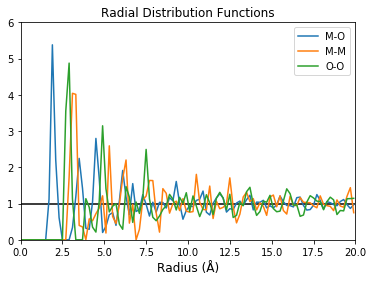

In [91]:
plt.hlines(1, 0, 20)
plt.plot(m_o_rad, m_o_rdf, label="M-O")
plt.plot(m_m_rad, m_m_rdf, label="M-M")
plt.plot(o_o_rad, o_o_rdf, label="O-O")
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.legend()
plt.xlabel("Radius (Å)", fontsize=12)
_ = plt.title("Radial Distribution Functions")

You can see RDFs converge on 1 upon the increase of the radius.

## Crystal graph

If you are in a hurry, please read the paper about the crystal graph: https://arxiv.org/abs/1710.10324

When at least one of the cell edges is smaller than double the minimum distance between metal and oxygen atoms, the crystal graph becomes unpreferable. In such cases, this notebook uses [the supercell method][a].

[a]: https://en.wikipedia.org/wiki/Supercell_(crystal)

In [92]:
def get_supercell(reduced_coords, amat, l_max, m_max, n_max):
    sc_indeces = np.array([l_max, m_max, n_max])
    sc_amat = amat * sc_indeces
    sc_red = []
    for l in range(l_max):
        for m in range(m_max):
            for n in range(n_max):
                for rc in reduced_coords:
                    x = rc[0] + np.array([l, m, n])
                    x /= sc_indeces
                    sc_red.append([x, rc[1]])

    return sc_red, sc_amat

In [93]:
sc_lmn = get_optimal_lmn(B, R_max=3.6)
print("Supercell:", sc_lmn)

del sc_lmn["R_max"]
sc_red, sc_A = get_supercell(crystal_red, A, **sc_lmn)

sc_dist, sc_Rij = get_shortest_distances(sc_red, sc_A)

natom = len(sc_red)
m_atoms = [i for i in range(natom) if sc_red[i][1] != 'O']
o_atoms = [i for i in range(natom) if sc_red[i][1] == 'O']

Supercell: {'l_max': 1, 'm_max': 1, 'n_max': 1, 'R_max': 3.6}


In [96]:
import networkx as nx
#
# Database of Ionic Radii (Note changed to Crystal Radii)
# http://abulafia.mt.ic.ac.uk/shannon/ptable.php
#
# Coordination IV
R_O = 1.26
#
# Coordination VI
R_Al = 0.675
R_Ga = 0.76
R_In = 0.94
#
R_ionic = { "O" : R_O, "Al" : R_Al, "Ga" : R_Ga, "In" : R_In }

def get_crytal_graph(reduced_coords, dists, factor=1.5):
    natom = len(reduced_coords)
    G = nx.Graph()
    for i in range(natom):
        symbol_i = reduced_coords[i][1]
        for j in range(i):
            symbol_j = reduced_coords[j][1]
            if (symbol_i == "O" and symbol_j != "O") or (symbol_i != "O" and symbol_j == "O"):
                node_i = symbol_i + "_" + str(i)
                node_j = symbol_j + "_" + str(j)
                R_max = (R_ionic[symbol_i] + R_ionic[symbol_j]) * factor
                if dists[i, j] < R_max:
                    G.add_edge(node_i, node_j)
    
    return G

If you find lack or excess of connections, you should adjust `factor`. Maybe, close-packed lattices require a lower value than the default value. For a hcp-like lattice, I used `factor=1.2`.

I recommend the factor that depends on the spacegroup and the gamma:

In [125]:
def get_factor(spacegroup, gamma):
    if spacegroup == 12:
        return 1.4
    elif spacegroup == 33:
        return 1.4
    elif spacegroup == 167:
        return 1.5
    elif spacegroup == 194:
        return 1.3
    elif spacegroup == 206:
        return 1.5
    elif spacegroup == 227:
        if gamma < 60:
            return 1.4
        else:
            return 1.5
    else:
        raise NameError('get_factor does not support the spacegroup: {}'.format(spacegroup))

In [126]:
spacegroup = df_crystals.spacegroup.values[row_id]
angle_gamma = df_crystals.lattice_angle_gamma_degree.values[row_id]
cg_factor = get_factor(spacegroup, angle_gamma)
G = get_crytal_graph(sc_red, sc_dist, factor=cg_factor)

print("Spacegroup:", spacegroup)
print("Gamma:", angle_gamma)
print("Node count:", G.number_of_nodes())
print("Edge count:", G.number_of_edges())

for i in range(natom):
    symbol_i = sc_red[i][1]
    node_i = symbol_i + "_" + str(i)
    crdn_i = list(G.neighbors(node_i))
    print(node_i, len(crdn_i), crdn_i)

Spacegroup: 33
Gamma: 90.0017
Node count: 80
Edge count: 176
Ga_0 4 ['O_38', 'O_40', 'O_57', 'O_62']
Al_1 4 ['O_39', 'O_41', 'O_56', 'O_63']
Al_2 4 ['O_36', 'O_42', 'O_59', 'O_60']
Ga_3 4 ['O_37', 'O_43', 'O_58', 'O_61']
Ga_4 4 ['O_34', 'O_45', 'O_58', 'O_60']
Al_5 4 ['O_35', 'O_44', 'O_59', 'O_61']
Al_6 4 ['O_32', 'O_47', 'O_56', 'O_62']
Al_7 4 ['O_33', 'O_46', 'O_57', 'O_63']
Al_8 6 ['O_33', 'O_38', 'O_45', 'O_48', 'O_54', 'O_78']
Ga_9 6 ['O_32', 'O_39', 'O_44', 'O_49', 'O_55', 'O_79']
Ga_10 6 ['O_35', 'O_36', 'O_47', 'O_50', 'O_52', 'O_76']
Al_11 6 ['O_34', 'O_37', 'O_46', 'O_51', 'O_53', 'O_77']
Al_12 6 ['O_34', 'O_36', 'O_40', 'O_51', 'O_52', 'O_74']
Ga_13 6 ['O_35', 'O_37', 'O_41', 'O_50', 'O_53', 'O_75']
Al_14 6 ['O_32', 'O_38', 'O_42', 'O_49', 'O_54', 'O_72']
Ga_15 6 ['O_33', 'O_39', 'O_43', 'O_48', 'O_55', 'O_73']
Ga_16 6 ['O_38', 'O_42', 'O_48', 'O_58', 'O_64', 'O_73']
Al_17 6 ['O_39', 'O_43', 'O_49', 'O_59', 'O_65', 'O_72']
Ga_18 6 ['O_36', 'O_40', 'O_50', 'O_56', 'O_66', 'O

There are 4, 6-coordinated Al and Ga atoms, and 3, 4, 5-coordinated O atoms.

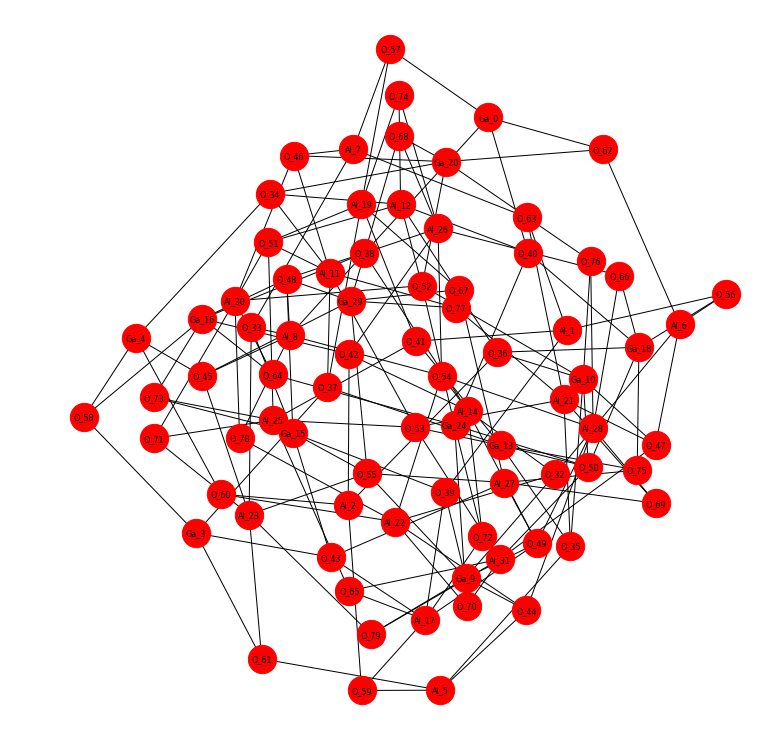

In [127]:
plt.figure(figsize=(10, 10))
nx.draw_spring(G, with_labels=True, node_size=800, font_size=8)

All edges of the crystal graph are imported as bonds in the below gemometry figure.
![Crystal graph to Jmol viewer](https://github.com/Tony-Y/MaterialsAreSimilarToDocuments/blob/master/geometry_add2.jpg?raw=true)

You can generate the bonds for Jmol using the following script:  

In [128]:
def generate_jmol_bonds(G, xyz_coords, reduced_coords, amat,
                        jmol_bonds_fn="./jmol_bonds.spt",
                        jmol_xyz_fn = "./jmol_geometry.xyz"):
    add_atoms = []
    na = len(reduced_coords)
    with open(jmol_bonds_fn, "w") as f:
        f.write("set autobond off\n")
        f.write("load \"{}\"\n".format(jmol_xyz_fn))
        f.write("background [x0000cc]\n")
        f.write("set bondradiusmilliangstroms 100\n")
        f.write("set perspectiveDepth true\n")
        for e in G.edges():
            e1 = e[0].split("_")
            e2 = e[1].split("_")
            i = int(e1[1])
            j = int(e2[1])
            red = reduced_coords[i][0] - reduced_coords[j][0]
            if np.sum(np.abs(red) > 0.5) > 0:
                sign_vec = [0] * 3
                for k in range(3):
                    if red[k] > 0.5:
                        sign_vec[k] = 1
                    elif red[k] < -0.5:
                        sign_vec[k] = -1
                lat_vec = np.matmul(amat, sign_vec)
                xyz_i = xyz_coords[i][0] - lat_vec
                ii = na
                na += 1
                add_atoms.append([xyz_i, e1[0]])
                xyz_j = xyz_coords[j][0] + lat_vec
                jj = na
                na += 1
                add_atoms.append([xyz_j, e2[0]])
                atom1 = e1[0]+str(i+1)
                atom2 = e2[0]+str(jj+1)
                f.write("connect ({}) ({}) single\n".format(atom1, atom2))
                atom1 = e1[0]+str(ii+1)
                atom2 = e2[0]+str(j+1)
                f.write("connect ({}) ({}) single\n".format(atom1, atom2))
            else:
                atom1 = e1[0]+str(i+1)
                atom2 = e2[0]+str(j+1)
                f.write("connect ({}) ({}) single\n".format(atom1, atom2))

    with open(jmol_xyz_fn, "w") as f:
        f.write("#=================================\n")
        f.write("#Created using the Crystal Graph\n")
        f.write("#=================================\n")
        for i in range(3):
            f.write("lattice_vector {} {} {}\n".format(amat[0,i], amat[1,i], amat[2,i]))
        for atom in xyz_coords:
            f.write("atom {} {} {} {}\n".format(atom[0][0], atom[0][1], atom[0][2], atom[1]))
        for atom in add_atoms:
            f.write("atom {} {} {} {}\n".format(atom[0][0], atom[0][1], atom[0][2], atom[1]))

In [129]:
sc_xyz = [ [np.matmul(sc_A, atom[0]), atom[1]] for atom in sc_red]
generate_jmol_bonds(G, sc_xyz, sc_red, sc_A)

In [130]:
# Please see `Output` of this notebook or uncomment the following two lines.
#with open("jmol_bonds.spt") as f:
#    print(f.read())

In [131]:
# Please see `Output` of this notebook or uncomment the following two lines.
#with open("jmol_geometry.xyz") as f:
#    print(f.read())

Put the two files, **jmol_bonds.spt** and **jmol_geometry.xyz** on the same directory, and run Jmol as:

`java -Xmx512m -jar /your/installed/directory/Jmol.jar jmol_bonds.spt`

Note that `/your/installed/directory` is different for each person.

## Graph distance

In [132]:
path_lengths = np.ones((natom, natom), dtype=np.int)
for i in range(natom):
    atom_i = sc_red[i][1] + "_" + str(i)
    for j in range(i):
        atom_j = sc_red[j][1] + "_" + str(j)
        path_lengths[i, j] = nx.shortest_path_length(G, atom_i, atom_j)
        path_lengths[j, i] = path_lengths[i, j]
path_lengths

array([[1, 4, 4, ..., 5, 3, 5],
       [4, 1, 4, ..., 3, 5, 3],
       [4, 4, 1, ..., 5, 3, 5],
       ...,
       [5, 3, 5, ..., 1, 4, 4],
       [3, 5, 3, ..., 4, 1, 4],
       [5, 3, 5, ..., 4, 4, 1]])

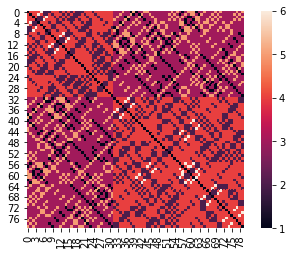

In [134]:
import seaborn as sns
sns.heatmap(path_lengths, square=True);

## Histogram of angles

In [135]:
def get_angles(G, Rij, atom1):
    angles = []
    crdn1 = list(G.neighbors(atom1))
    crdn1_indeces = [int(atom.split("_")[1]) for atom in crdn1]
    i1 = int(atom1.split("_")[1])
    for i in range(len(crdn1)):
        i2 = crdn1_indeces[i]
        v2 = Rij[i2, i1]
        for j in range(i):
            i3 = crdn1_indeces[j]
            v3 = Rij[i3, i1]
            angle = angle_deg_between(v2, v3)
            angles.append(angle)
            #print(atom1, crdn1[i], crdn1[j], angle, length(v2), length(v3))
    return angles       

In [136]:
o_m_o_angles = []
for i in m_atoms:
    atom = sc_red[i][1] + "_" + str(i)
    o_m_o_angles += get_angles(G, sc_Rij, atom)

m_o_m_angles = []
for i in o_atoms:
    atom = sc_red[i][1] + "_" + str(i)
    m_o_m_angles += get_angles(G, sc_Rij, atom)

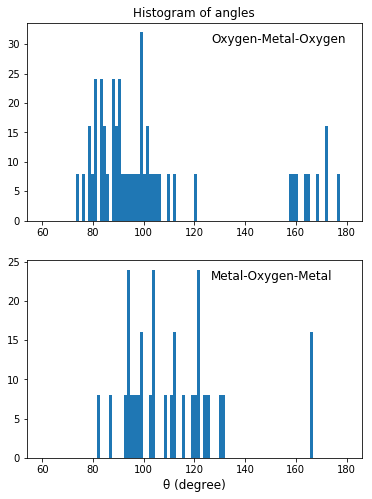

In [138]:
plt.figure(figsize=(6,8))

ax1 = plt.subplot(211)
hist_m_angle = plt.hist(o_m_o_angles, bins=100, range=(60,180))
plt.text(0.55, 0.9, "Oxygen-Metal-Oxygen", fontsize=12, transform=ax1.transAxes)
plt.title("Histogram of angles")

ax2 = plt.subplot(212)
hist_o_angle = plt.hist(m_o_m_angles, bins=100, range=(60,180))
plt.text(0.55, 0.9, "Metal-Oxygen-Metal", fontsize=12, transform=ax2.transAxes)
plt.xlabel("θ (degree)", fontsize=12);

## Histogram of dihedral angles

You can find the definition at Wikipedia: [Dihedral_angle](https://en.wikipedia.org/wiki/Dihedral_angle)

In [139]:
def get_dihedral_angles(G, Rij, atom1, atom2):
    dihedral_angles = []
    crdn1 = list(G.neighbors(atom1))
    crdn2 = list(G.neighbors(atom2))
    crdn1.remove(atom2)
    crdn2.remove(atom1)
    for c1 in crdn1:
        for c2 in crdn2:
            if c1 == c2: continue
            j1 = int(atom1.split("_")[1])
            j2 = int(atom2.split("_")[1])
            i1 = int(c1.split("_")[1])
            i2 = int(c2.split("_")[1])
            v0 = Rij[i1, i2]
            v1 = Rij[i1, j1]
            v2 = Rij[i2, j2]
            uv0 = unit_vector(v0)
            w1 = v1 - np.dot(v1, uv0) * uv0
            w2 = v2 - np.dot(v2, uv0) * uv0
            if length(w1) < 1e-8 or length(w2) < 1e-8: continue
            angle = angle_deg_between(w1, w2)
            dihedral_angles.append(angle)
            #print(atom1, atom2, c1, c2, angle, length(v0), length(v1), length(v2), length(w1), length(w2))
    
    return dihedral_angles

In [140]:
train_dihedral = []
for i in m_atoms:
    atom1 = sc_red[i][1] + "_" + str(i)
    for atom2 in G.neighbors(atom1):
        train_dihedral += get_dihedral_angles(G, sc_Rij, atom1, atom2)

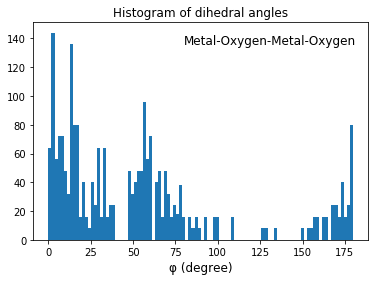

In [141]:
hist_dihedral = plt.hist(train_dihedral, bins=100)
ax = plt.axes()
plt.text(0.45, 0.9, "Metal-Oxygen-Metal-Oxygen", fontsize=12, transform=ax.transAxes)
plt.title("Histogram of dihedral angles")
plt.xlabel("φ (degree)", fontsize=12);